# BoomBikes Case Study - Linear Regression

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing required libraries

In [973]:
# Supress(importing) Warnings

import warnings
warnings.filterwarnings('ignore')

In [974]:
# Importing all the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data

In [975]:
# Reading the dataset
df = pd.read_csv("day.csv")

# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [976]:
# Checking the shape

df.shape

(730, 16)

In [977]:
# Checking null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [978]:
# Checking mathematiacal distribution of the variables

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [979]:
# Dropping "instant" column as it is "record index" and not needed

df.drop("instant", axis=1 , inplace=True)

In [980]:
# Dropping "casual" and "registrerd" columns as they both contribute to our Target variable "cnt" column

df.drop("casual", axis=1 , inplace=True)
df.drop("registered", axis=1 , inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [981]:
# Dropping "dteday" column as it is not required as we have "mnth" and "yr" column

df.drop("dteday", axis=1 , inplace=True)

In [982]:
df.shape

(730, 12)

In [983]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [984]:
# Dropping "holiday" column as well. Because 0 in "workingday" column already reflects a holiday

df.drop("holiday" , inplace=True , axis=1)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

### Visualising Numeric Variables

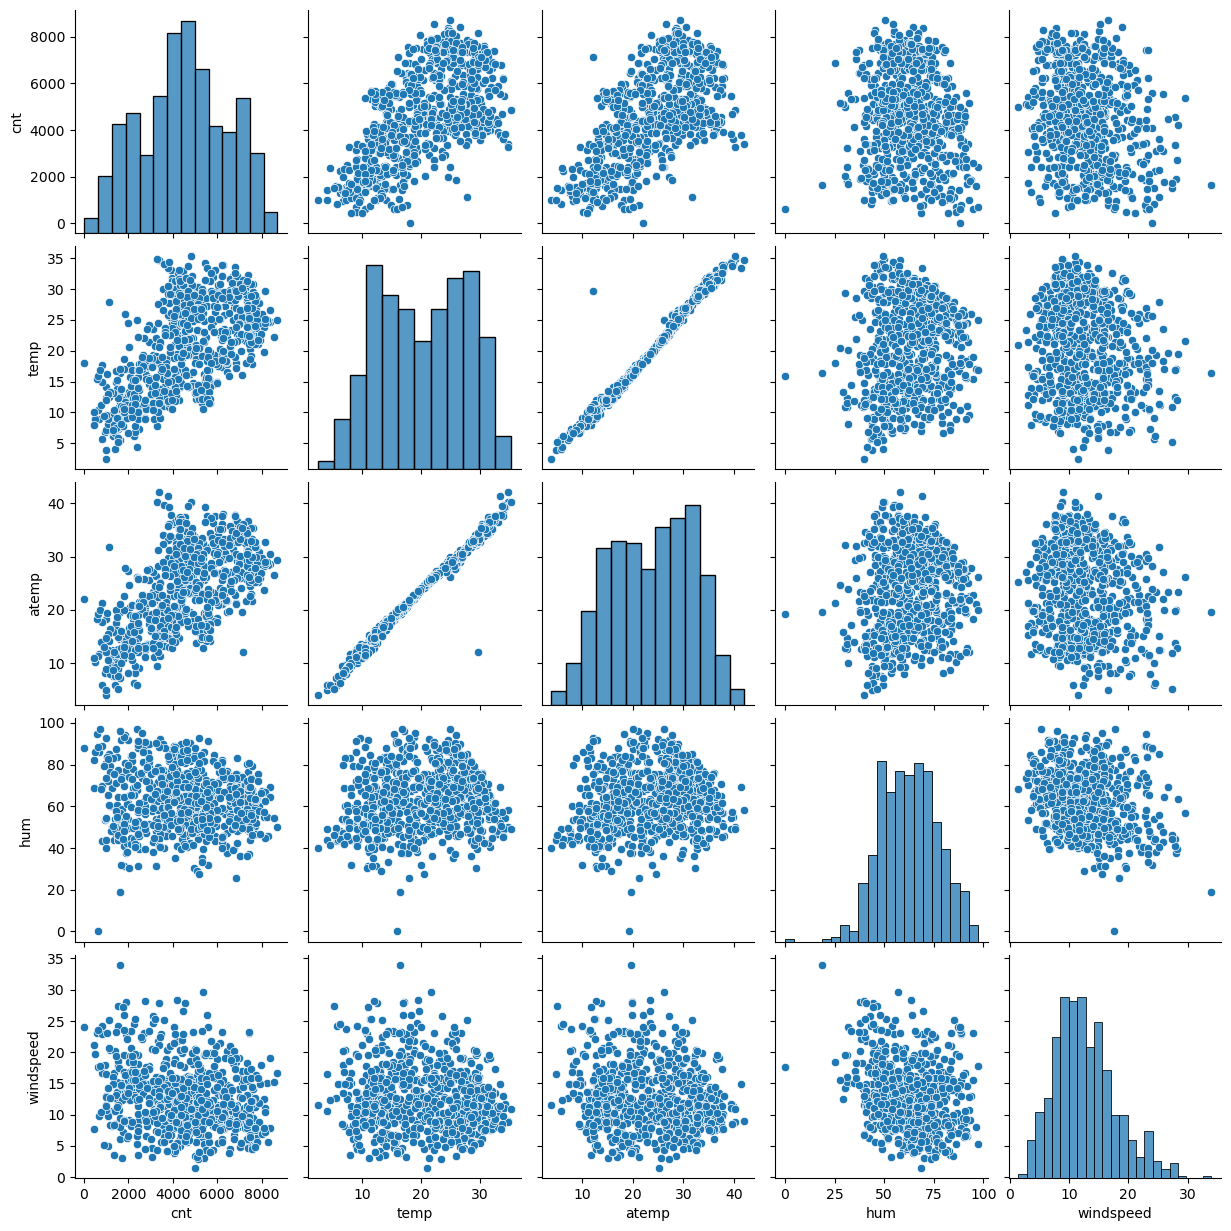

In [985]:
# Scatter plot to identify the relationship between "cnt" and other continous variables

sns.pairplot(df[["cnt", "temp", "atemp", "hum", "windspeed"]])
plt.show()

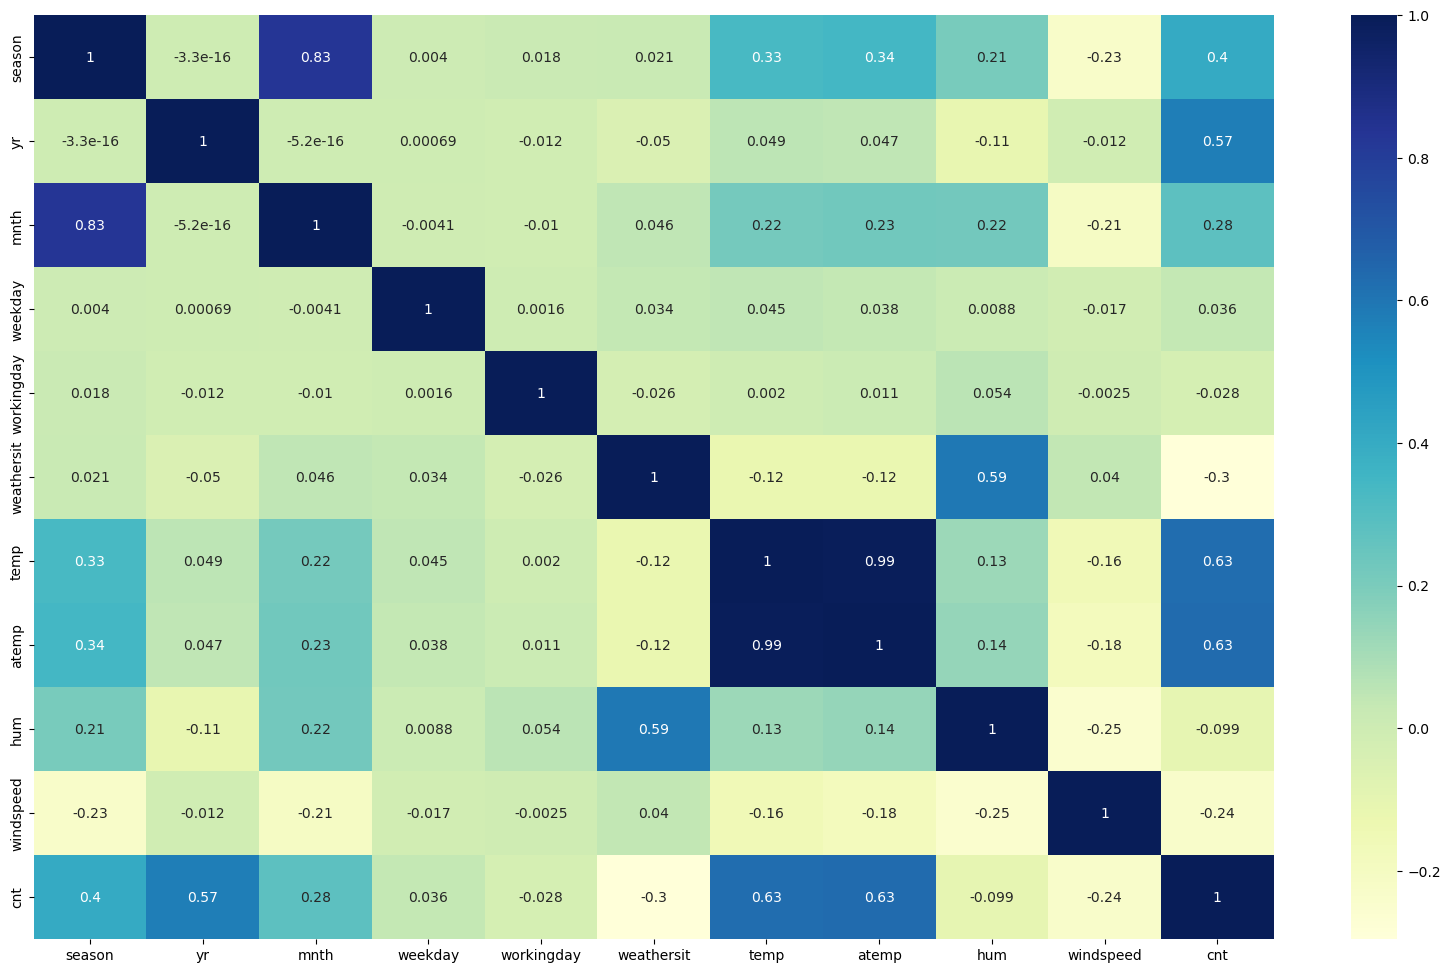

In [986]:
# Checking the correlation between every variable

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr() , annot=True , cmap = 'YlGnBu')
plt.show()

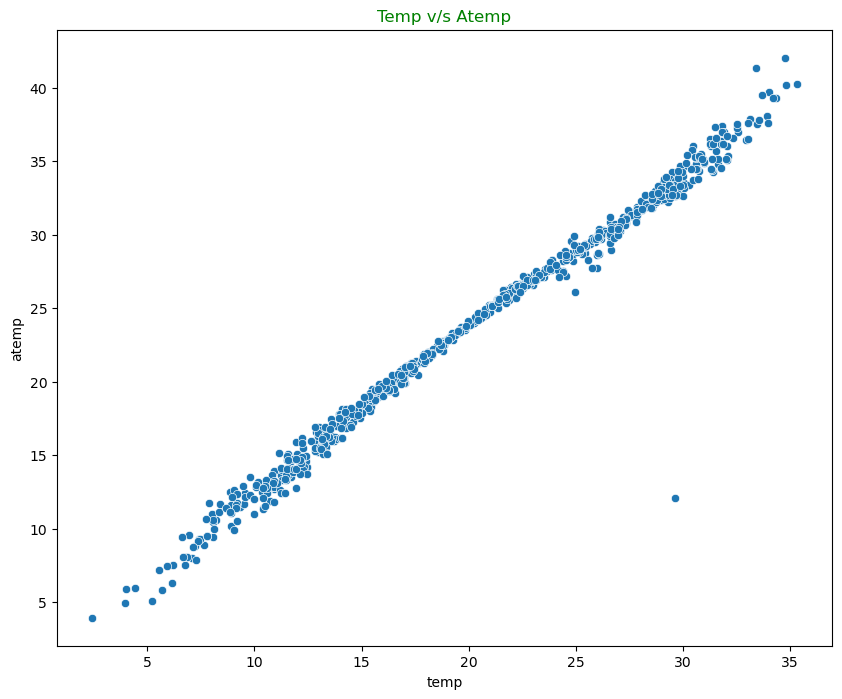

In [987]:
# Checking the correlation between "temp" and "atemp" using scatter plot

plt.figure(figsize= [10,8])
sns.scatterplot(df.temp, df.atemp)
plt.title("Temp v/s Atemp", c = "Green")
plt.show()

### Note: It can be seen that both the variables(temp and atemp) are highly correlated. Hence one should be dropped. Else Multicollinearity may occur.

In [988]:
# Dropping "atemp" column

df.drop("atemp" , inplace=True , axis=1)

In [989]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


### Visualising Categorical Variables

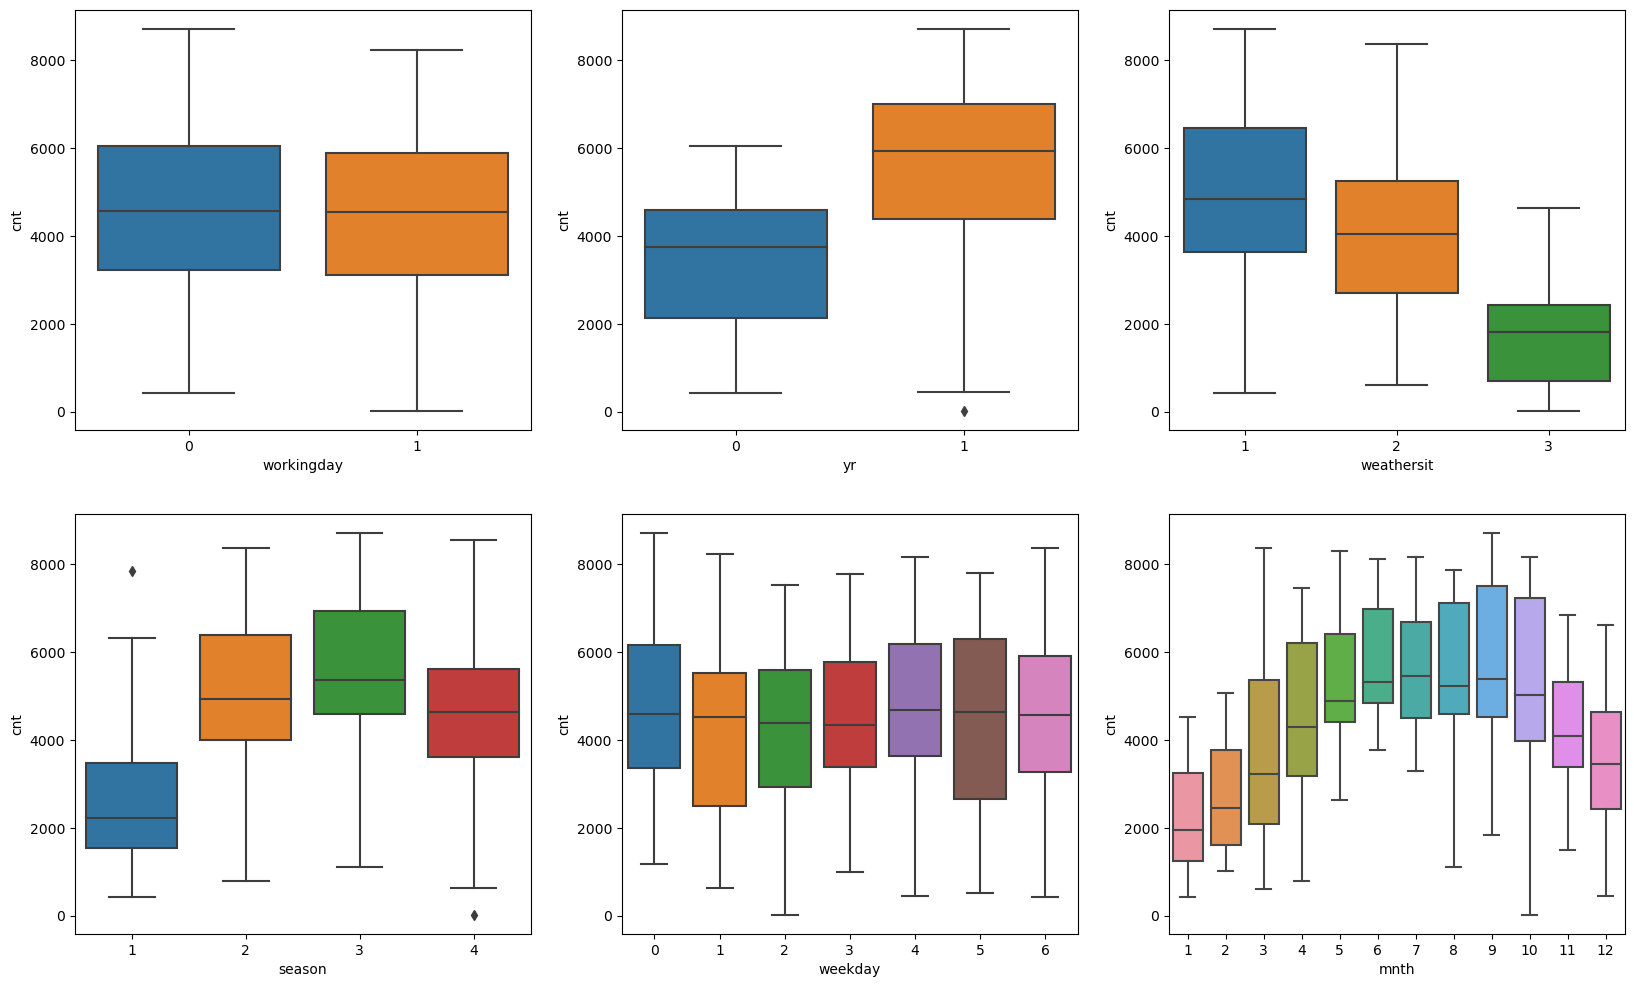

In [990]:
# Subplotting the boxplot for categorical variables with respect to the count variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

### Inferences:

* There was a considerable increment in user base from 2018 to 2019
* Demand for bike is visibly low during Spring Season
* Demand for bikes is the highest in the months of August , September & October

## Step 3: Data Preparation

### Preparing the Data for modelling

* Encoding:

    * Converting Binary variable to 1/0
    * Converting Other variables to Dummy Variables

* Splitting into Test and Train

* Rescaling the variables

### Note: There are only two Binary variable i.e., "yr" and "workingday". Both of them are already in 1/0 format. Hence no need for Binary variable conversion.

In [991]:
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


### Mapping Categorical values with respective values

In [992]:
# Mapping "season" Column

season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
df['season'] = df['season'].map(season_map)

# Mapping "mnth" Column

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr' , 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df.mnth = df.mnth.map(month_map)

# Mapping "weekday" Column

week_map = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday' , 5:'Friday', 6:'Saturday', 7:'Sunday'}
df.weekday = df.weekday.map(week_map)

# Mapping "weathersit" Column

weather_map = {1:'Clear', 2:'Mist', 3:'Light_rain_snow', 4:'Heavy_rain_snow'}
df.weathersit = df.weathersit.map(weather_map)

df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Creating Dummy Variables

In [993]:
# Creating Dummy for "season" column

season_dummy = pd.get_dummies(df['season'], drop_first = True)
season_dummy.sample(5)

,Spring,Summer,Winter
196,0,0,0
187,0,0,0
14,1,0,0
31,1,0,0
390,1,0,0


In [994]:
# Creating Dummy for "mnth" column

month_dummy = pd.get_dummies(df['mnth'], drop_first = True)
month_dummy.sample(5)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
9,0,0,0,1,0,0,0,0,0,0,0
342,0,1,0,0,0,0,0,0,0,0,0
567,0,0,0,0,1,0,0,0,0,0,0
67,0,0,0,0,0,0,1,0,0,0,0
387,0,0,0,1,0,0,0,0,0,0,0


In [995]:
# Creating Dummy for "weekday" column

week_dummy = pd.get_dummies(df['weekday'], drop_first = True)
week_dummy.sample(5)

,Monday,Saturday,Thursday,Tuesday,Wednesday
592,0,0,0,0,0
443,0,0,0,0,1
44,0,0,0,0,1
192,0,0,1,0,0
589,0,0,0,1,0


In [996]:
# Creating Dummy for "weathersit" column

weather_dummy = pd.get_dummies(df['weathersit'], drop_first = True)
weather_dummy.sample(5)

,Light_rain_snow,Mist
620,0,0
171,0,1
489,0,1
445,0,0
104,0,0


In [997]:
# Concatenation Dummy variable df's to original df

df = pd.concat([df, season_dummy], axis=1)

df = pd.concat([df, month_dummy], axis=1)

df = pd.concat([df, week_dummy], axis=1)

df = pd.concat([df, weather_dummy], axis=1)

df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
0,Spring,0,Jan,Monday,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [998]:
pd.set_option('display.max_columns' , 100)

In [999]:
# Dropping original columns after dummy creation

df.drop(["season", "mnth", "weekday", "weathersit"], inplace=True, axis=1)

df.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1000]:
# Checking the info about the new dataframe after dummies addition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temp             730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   Spring           730 non-null    uint8  
 7   Summer           730 non-null    uint8  
 8   Winter           730 non-null    uint8  
 9   Aug              730 non-null    uint8  
 10  Dec              730 non-null    uint8  
 11  Feb              730 non-null    uint8  
 12  Jan              730 non-null    uint8  
 13  Jul              730 non-null    uint8  
 14  Jun              730 non-null    uint8  
 15  Mar              730 non-null    uint8  
 16  May              730 non-null    uint8  
 17  Nov             

## Step 4: Splitting the Data into Training and Testing Sets

In [1001]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 27)
(219, 27)


### Rescaling the Features (Scaling the Training dataset)

In [1002]:
# Instantiating an object
scaler = MinMaxScaler()

In [1003]:
# Create a lits of only numerical variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# Fit the scaler on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1004]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


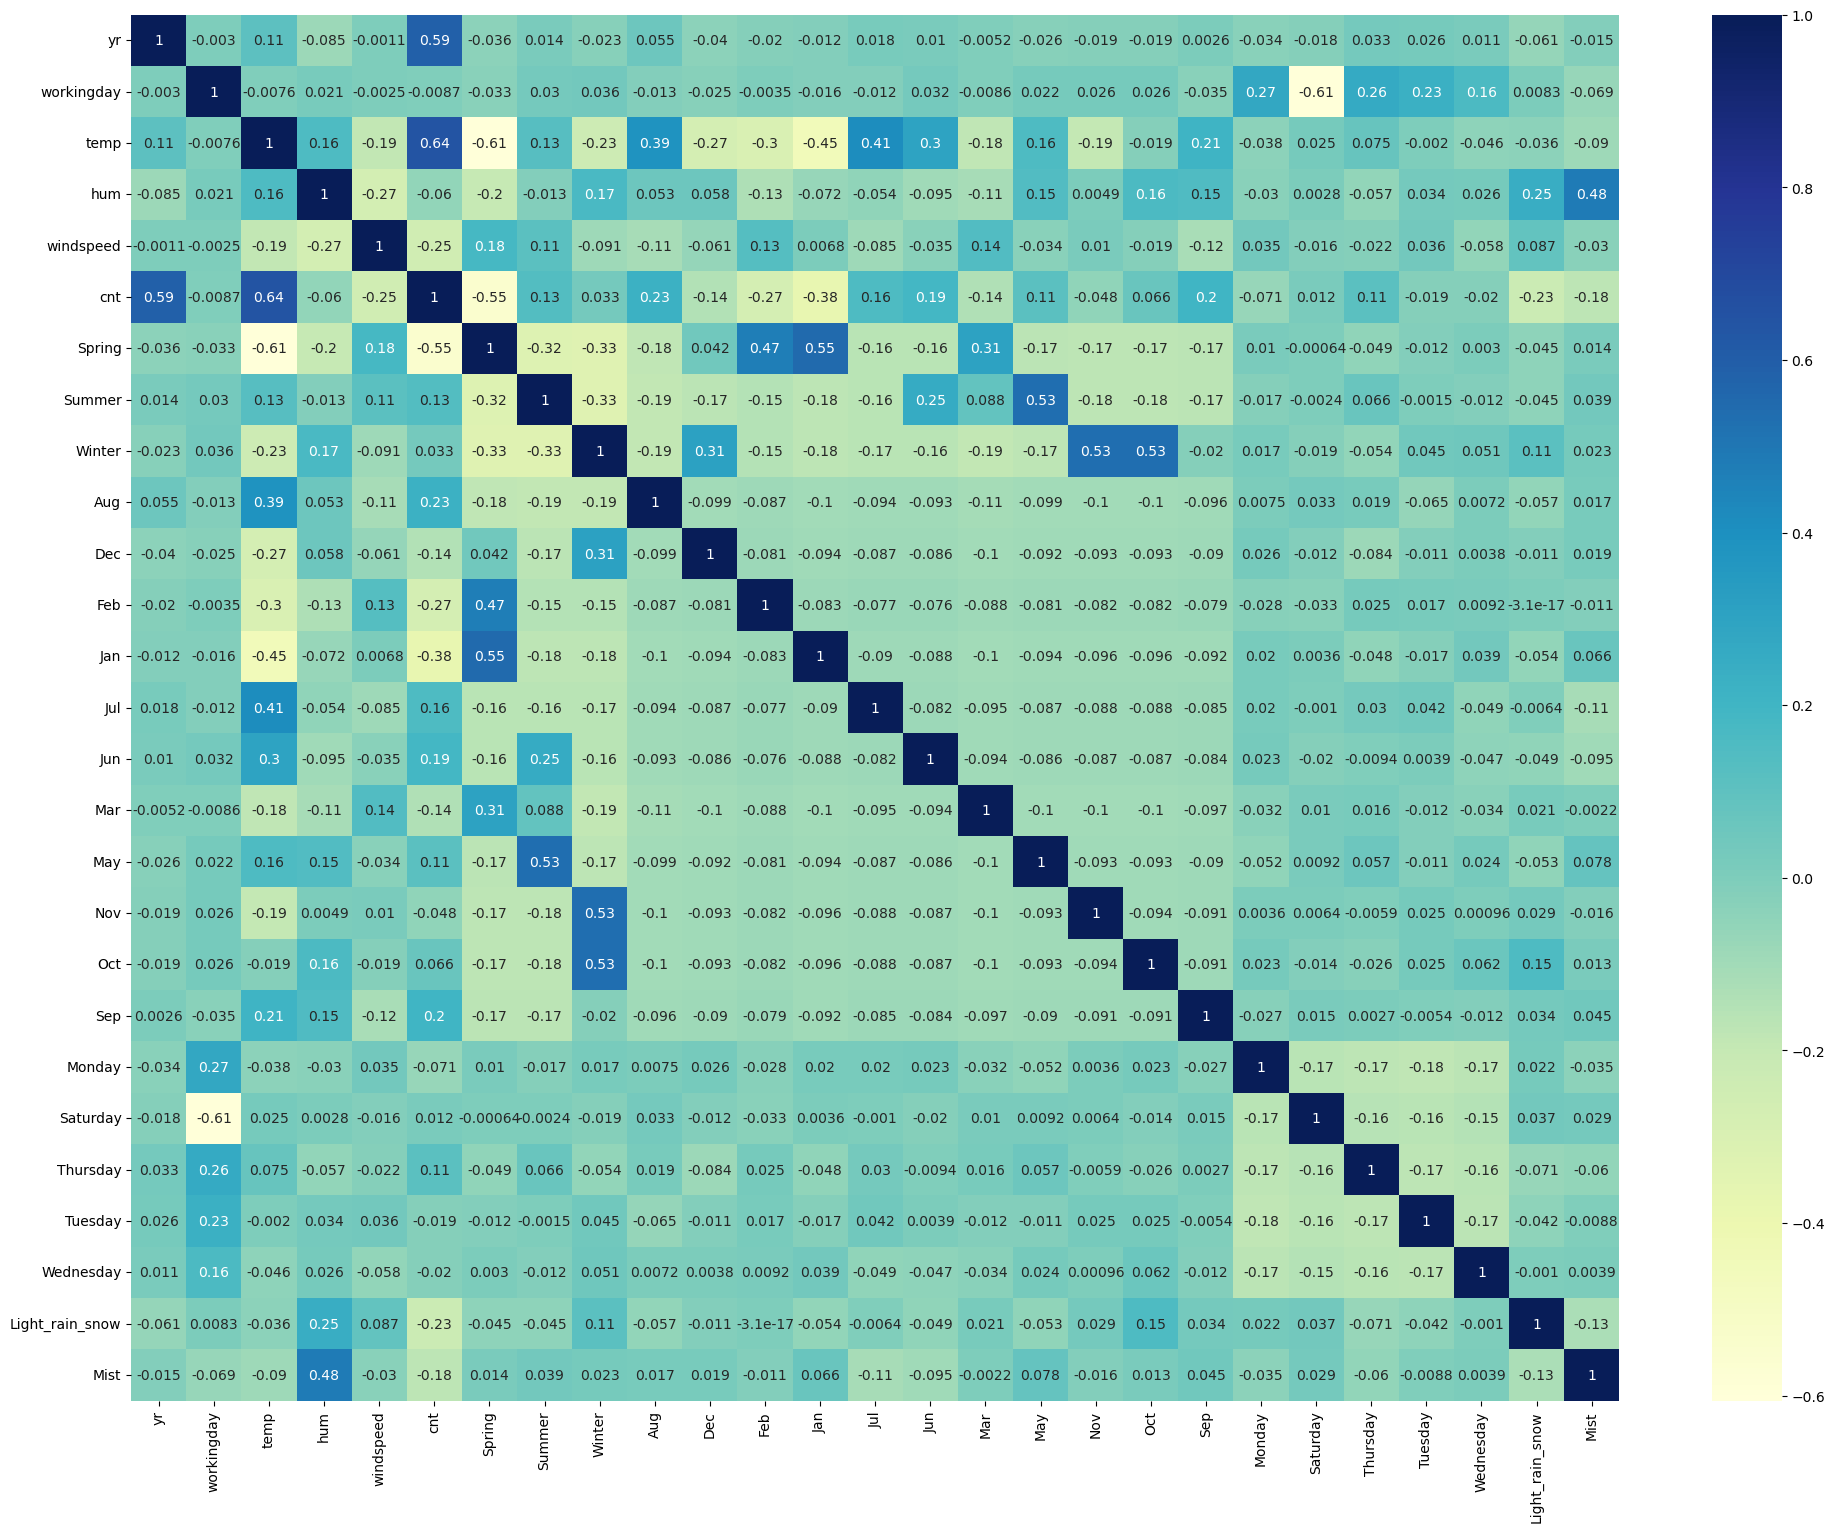

In [1005]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24,18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1006]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [1007]:
X_train.head()

,yr,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
653,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1008]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Building a linear model using RFE(Recursive Feature Elimination) method

### Adding all the variables to the model

In [1009]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1010]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 11),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 4),
 ('Saturday', False, 9),
 ('Thursday', False, 8),
 ('Tuesday', False, 3),
 ('Wednesday', False, 5),
 ('Light_rain_snow', True, 1),
 ('Mist', True, 1)]

In [1011]:
# Looking at the top 15 variables that RFE choose
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec', 'Feb',
       'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Light_rain_snow', 'Mist'],
      dtype='object')

In [1012]:
# Variables that were not chosen by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Summer', 'Aug', 'Jun', 'Mar', 'Oct', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

In [1013]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Checking the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.08e-187
Time:                        16:04:38   Log-Likelihood:                 510.03
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     494   BIC:                            -920.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3754      0.032     

In [1014]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.71
2,temp,3.66
5,Spring,3.60
6,Winter,2.49
9,Jan,2.28
3,hum,1.95
8,Feb,1.82
12,Nov,1.71
7,Dec,1.58
15,Mist,1.56


In [1015]:
X = X.drop(["Feb"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X)

# Running the linear model
lm_0 = sm.OLS(y_train,X_train_rfe).fit()

# Checking the summary of our linear model
print(lm_0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.13e-187
Time:                        16:04:38   Log-Likelihood:                 507.67
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     495   BIC:                            -921.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3651      0.032     

In [1016]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.28
2,temp,3.49
5,Spring,2.89
6,Winter,2.49
3,hum,1.95
11,Nov,1.68
8,Jan,1.64
14,Mist,1.56
7,Dec,1.45
9,Jul,1.36


`hum` is insignificant in presence of other variables; can be dropped

In [1017]:
X = X.drop(["May"], axis = 1)

In [1018]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X)

# Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

# Checking the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.37e-187
Time:                        16:04:38   Log-Likelihood:                 504.81
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     496   BIC:                            -922.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3673      0.032     

In [1019]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.22
2,temp,3.48
5,Spring,2.74
6,Winter,2.34
3,hum,1.90
10,Nov,1.68
8,Jan,1.64
13,Mist,1.56
7,Dec,1.45
9,Jul,1.31


In [1020]:
X = X.drop(["Jan"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X)

# Running the linear model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

# Checking the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          8.64e-187
Time:                        16:04:38   Log-Likelihood:                 500.68
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     497   BIC:                            -920.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3509      0.032     

In [1021]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.18
2,temp,3.17
5,Spring,2.58
6,Winter,2.34
3,hum,1.89
9,Nov,1.66
12,Mist,1.56
7,Dec,1.37
8,Jul,1.30
11,Light_rain_snow,1.25


In [1022]:
X = X.drop(["Dec"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X)

# Running the linear model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

# Checking the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          4.37e-187
Time:                        16:04:38   Log-Likelihood:                 498.56
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     498   BIC:                            -922.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3429      0.032     

In [1023]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.26
2,temp,3.02
5,Spring,2.57
6,Winter,2.09
3,hum,1.88
11,Mist,1.55
8,Nov,1.44
7,Jul,1.29
10,Light_rain_snow,1.24
4,windspeed,1.17


In [1024]:
X = X.drop(["Nov"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X)

# Running the linear model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

# Checking the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.4
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.80e-187
Time:                        16:04:38   Log-Likelihood:                 496.15
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     499   BIC:                            -923.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3359      0.032     

In [1025]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.64
2,temp,2.99
5,Spring,2.54
3,hum,1.88
6,Winter,1.77
10,Mist,1.55
7,Jul,1.29
9,Light_rain_snow,1.24
4,windspeed,1.17
8,Sep,1.10


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1026]:
y_train_pred = lm_4.predict(X_train_rfe)

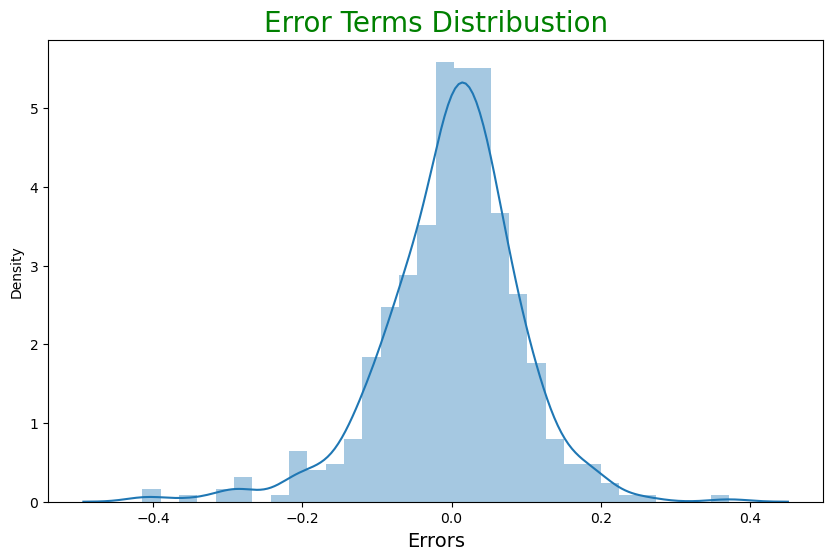

In [1027]:
# Plot the histogram of the error terms
plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), norm_hist=True)
plt.xlabel('Errors', fontsize = 14)  
plt.title('Error Terms Distribustion',fontdict={'fontsize' : 20 , 'color' : "Green" }) 
plt.show()

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model, i.e. `lm_4`.

### Applying the scaling on the test sets

In [1028]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1029]:
df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [1030]:
df_test.describe()

,yr,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Thursday,Tuesday,Wednesday,Light_rain_snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [1031]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1032]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1033]:
# Making predictions
y_pred = lm_4.predict(X_test_new)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

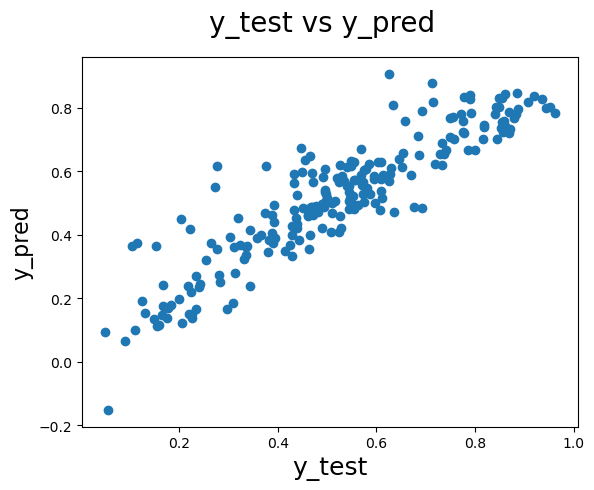

In [1034]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [1035]:
# Calculating the R-squarred value of the predictions

r2 = r2_score(y_true= y_test , y_pred= y_pred)
r2

0.8169624123553316

In [1036]:
# Adjusted R-squared value for the final model on test set

Adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-10-1))
print(Adj_r2)

0.8081625283339533


### The R-Squared predicted by the model on TEST SET 81.70% is very closed to R squared calculated by the model on TRAIN SET 83.40%
### The Adjusted R-squared predicted by the model on TEST SET 80.82% is very closed to Adjusted R-squared calculated by the model on TRAIN SET 83.00%
### Hence we can conclude that out model is predicting the Dependent variable effectively. So the model is valid with 10 parameters namely:
- yr
- temp
- hum
- windspeed
- Spring
- Winter
- Jul
- Sep
- Light_rain_snow
- Mist

## The equation of the best fitted line is as below:
$ Count = 0.2307×yr+0.4824×temp-0.1589×hum-0.1719×windspeed-0.1096×Spring+0.0541×Winter-0.0793×Jul+0.0573×Sep-0.2388×Light_rain_snow-0.0539×Mist $